<div style="text-align: left; background-color:#4e4e4e; font-family: Trebuchet MS; color:white; padding: 12px; line-height:1.25;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 38px;border-style: solid;border-color: dark green;">Obesity Levels Classification </div>

<br></br>
<div>    

<img src="https://mexicobariatriccenter.com/wp-content/uploads/2016/11/8-Causes-of-Obesity-Mexico-Bariatric-Center.png" width = '1260' height = '200'>    
</div>

<div style="text-align: left; background-color:#4e4e4e; font-family: Trebuchet MS; color:white; padding: 12px; line-height:1.25;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 38px;border-style: solid;border-color: dark green;">Import Libraries </div>


In [179]:
# Main Library To Manipulate Data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Models
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier

# assessment models
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay, confusion_matrix

# Ignore Any Warning
import warnings
warnings.filterwarnings('ignore')

<div style="text-align: left; background-color:#4e4e4e; font-family: Trebuchet MS; color:white; padding: 12px; line-height:1.25;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 38px;border-style: solid;border-color: dark green;">Import Data </div>


In [157]:
data = pd.read_csv('/kaggle/input/obesity-levels/ObesityDataSet_raw_and_data_sinthetic.csv')
data.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.0,Female,1.62,64.0,no,no,2.0,3.0,no,no,2.0,yes,0.0,1.0,Sometimes,Public_Transportation,Normal_Weight
1,21.0,Female,1.52,56.0,Sometimes,no,3.0,3.0,yes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,23.0,Male,1.80,77.0,Frequently,no,2.0,3.0,no,no,2.0,yes,2.0,1.0,Sometimes,Public_Transportation,Normal_Weight
3,27.0,Male,1.80,87.0,Frequently,no,3.0,3.0,no,no,2.0,no,2.0,0.0,Sometimes,Walking,Overweight_Level_I
4,22.0,Male,1.78,89.8,Sometimes,no,2.0,1.0,no,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


<div style="text-align: left; background-color:#4e4e4e; font-family: Trebuchet MS; color:white; padding: 12px; line-height:1.25;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 38px;border-style: solid;border-color: dark green;"> EDA </div>


In [158]:
# Show Some Info About Data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             2111 non-null   float64
 1   Gender                          2111 non-null   object 
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   CALC                            2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   SCC                             2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  family_history_with_overweight  2111 non-null   object 
 12  FAF                             21

In [159]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,2111.0,24.312600,6.345968,14.00,19.947192,22.777890,26.000000,61.00
Height,2111.0,1.701677,0.093305,1.45,1.630000,1.700499,1.768464,1.98
Weight,2111.0,86.586058,26.191172,39.00,65.473343,83.000000,107.430682,173.00
FCVC,2111.0,2.419043,0.533927,1.00,2.000000,2.385502,3.000000,3.00
NCP,2111.0,2.685628,0.778039,1.00,2.658738,3.000000,3.000000,4.00
CH2O,2111.0,2.008011,0.612953,1.00,1.584812,2.000000,2.477420,3.00
FAF,2111.0,1.010298,0.850592,0.00,0.124505,1.000000,1.666678,3.00
TUE,2111.0,0.657866,0.608927,0.00,0.000000,0.625350,1.000000,2.00


In [160]:
data.describe(include = ['O']).T

,count,unique,top,freq
Gender,2111,2,Male,1068
CALC,2111,4,Sometimes,1401
FAVC,2111,2,yes,1866
SCC,2111,2,no,2015
SMOKE,2111,2,no,2067
family_history_with_overweight,2111,2,yes,1726
CAEC,2111,4,Sometimes,1765
MTRANS,2111,5,Public_Transportation,1580
NObeyesdad,2111,7,Obesity_Type_I,351


<Axes: xlabel='Gender', ylabel='count'>

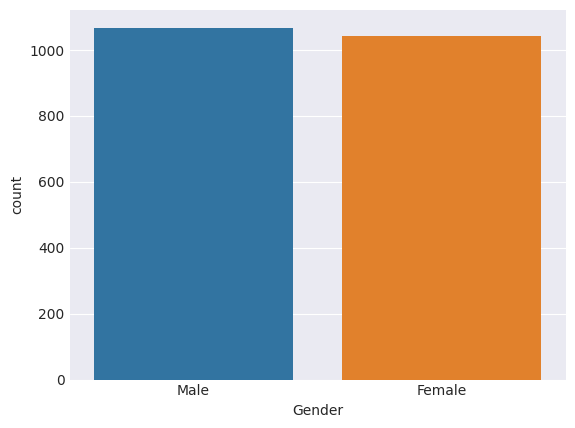

In [161]:
counter_gender = data['Gender'].value_counts()
sns.barplot(x = counter_gender.index, y = counter_gender)

<Axes: xlabel='SMOKE', ylabel='count'>

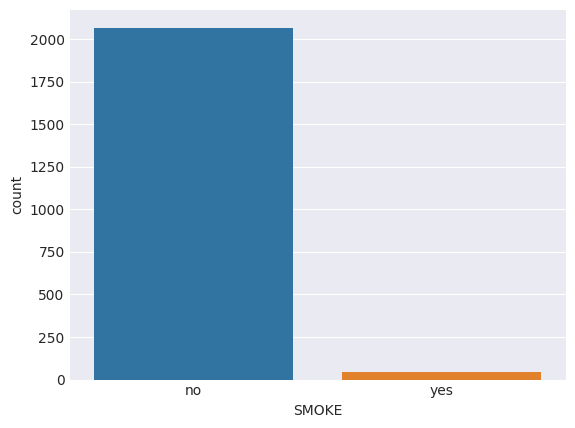

In [162]:
counter_gender = data['SMOKE'].value_counts()
sns.barplot(x = counter_gender.index, y = counter_gender)

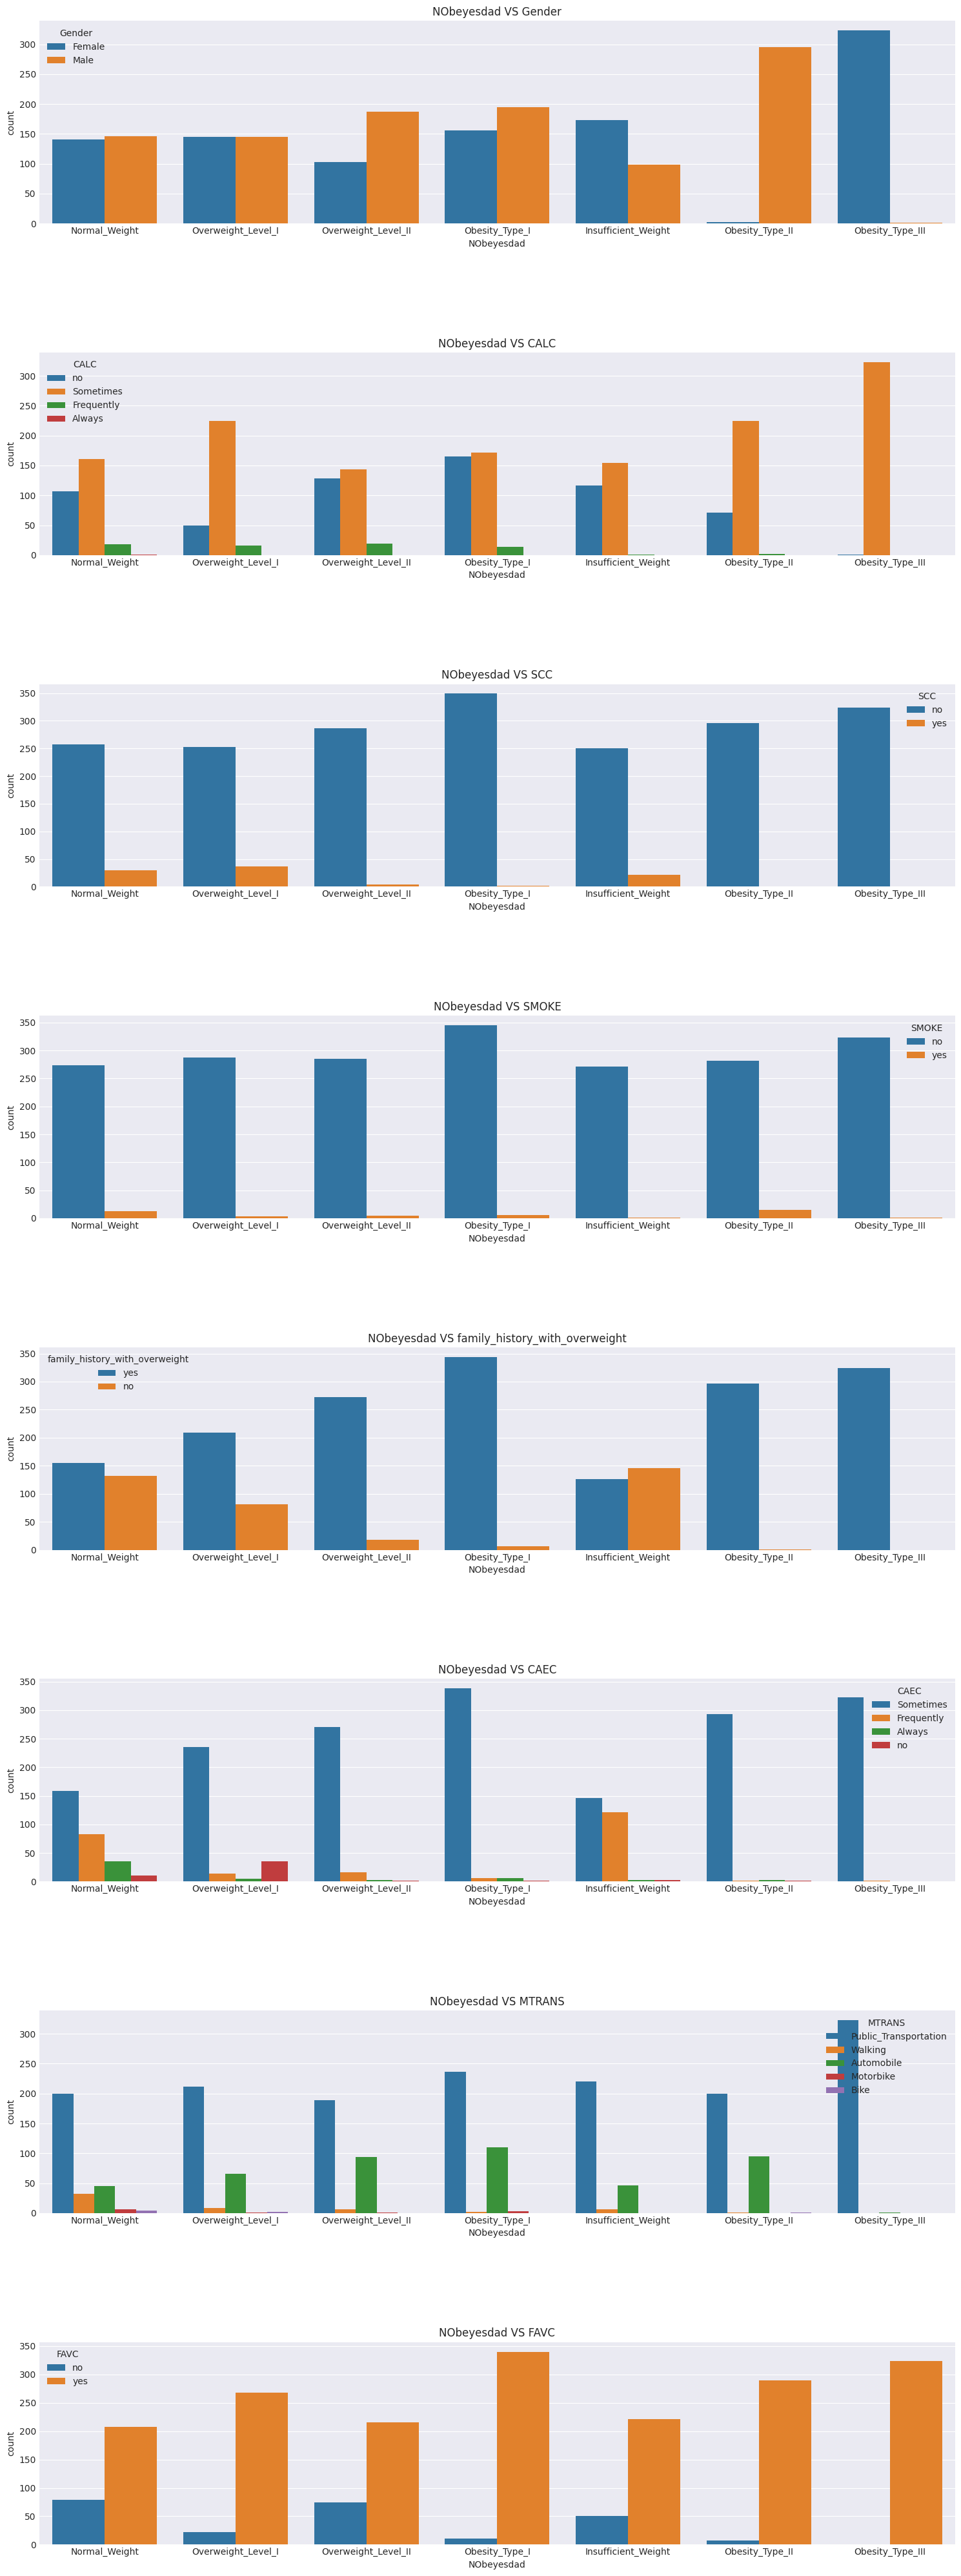

In [163]:
cat_cols = ['Gender', 'CALC', 'SCC', 'SMOKE', 'family_history_with_overweight', 'CAEC', 'MTRANS', 'FAVC']
fig, ax = plt.subplots(nrows = 8, figsize = (15, 40))
i = 0
for col in cat_cols :
    sns.countplot(data, x = 'NObeyesdad', hue = col, ax = ax[i])
    ax[i].set_title(f'NObeyesdad VS {col}')
    i += 1
fig.tight_layout(h_pad = 10)
plt.show();

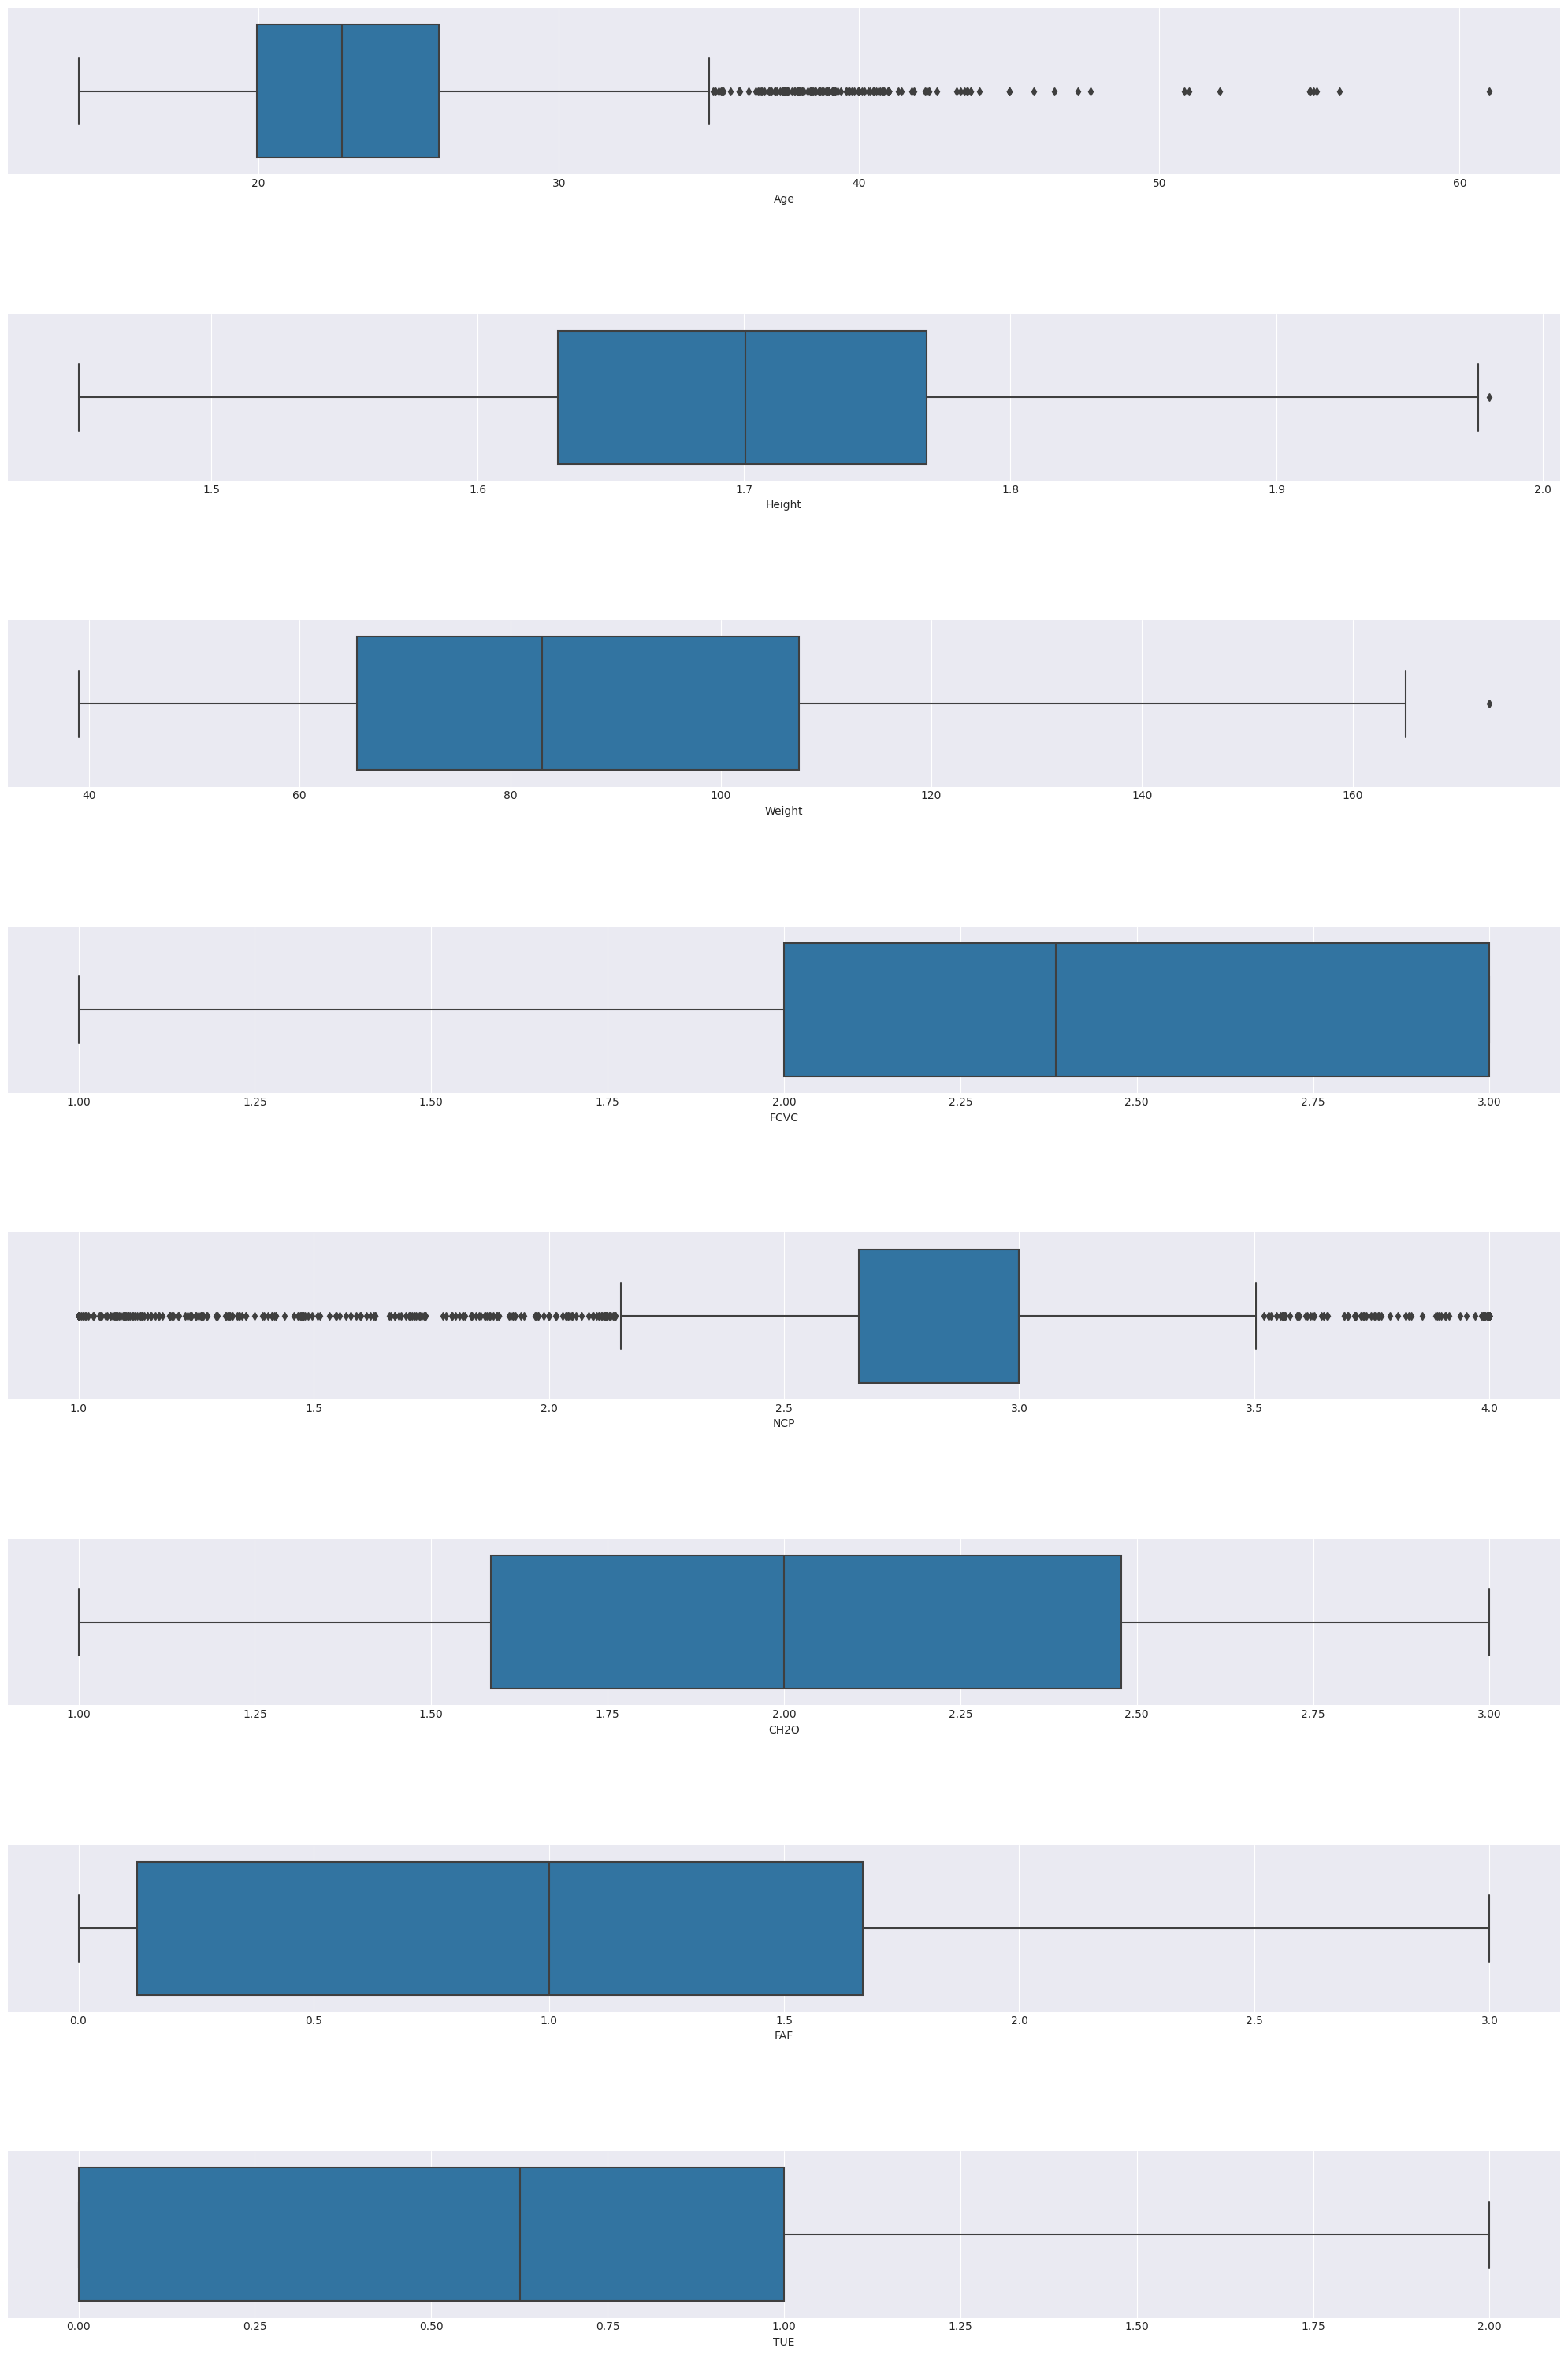

In [164]:
num_cols = data.describe().columns
nrwos = len(num_cols)
fig, ax = plt.subplots(nrows = nrwos, figsize = (20, 30))
i = 0
for col in num_cols:
    sns.boxplot(data = data, x = col, ax = ax[i])
    i += 1
fig.tight_layout(h_pad = 10)
plt.show()

In [165]:
for col in cat_cols:
    print(f'Uniqie Item in {col} Is : {data[col].unique()}')

Uniqie Item in Gender Is : ['Female' 'Male']
Uniqie Item in CALC Is : ['no' 'Sometimes' 'Frequently' 'Always']
Uniqie Item in SCC Is : ['no' 'yes']
Uniqie Item in SMOKE Is : ['no' 'yes']
Uniqie Item in family_history_with_overweight Is : ['yes' 'no']
Uniqie Item in CAEC Is : ['Sometimes' 'Frequently' 'Always' 'no']
Uniqie Item in MTRANS Is : ['Public_Transportation' 'Walking' 'Automobile' 'Motorbike' 'Bike']
Uniqie Item in FAVC Is : ['no' 'yes']


<div style="text-align: left; background-color:#4e4e4e; font-family: Trebuchet MS; color:white; padding: 12px; line-height:1.25;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 38px;border-style: solid;border-color: dark green;"> Data PreProcessing </div>


In [166]:
# Check Nulls 
data.isnull().sum()

Age                               0
Gender                            0
Height                            0
Weight                            0
CALC                              0
FAVC                              0
FCVC                              0
NCP                               0
SCC                               0
SMOKE                             0
CH2O                              0
family_history_with_overweight    0
FAF                               0
TUE                               0
CAEC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [167]:
# Check Duplicates
data.duplicated().sum()

24

In [168]:
# Drop Duplicates 
data.drop_duplicates(inplace=True)
data.duplicated().sum()

0

In [169]:
# Label Encoder
for col in cat_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    print(f'{col} == {le.classes_}')

Gender == ['Female' 'Male']
CALC == ['Always' 'Frequently' 'Sometimes' 'no']
SCC == ['no' 'yes']
SMOKE == ['no' 'yes']
family_history_with_overweight == ['no' 'yes']
CAEC == ['Always' 'Frequently' 'Sometimes' 'no']
MTRANS == ['Automobile' 'Bike' 'Motorbike' 'Public_Transportation' 'Walking']
FAVC == ['no' 'yes']


In [170]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [171]:
le_y = LabelEncoder()
y = le_y.fit_transform(y)


In [172]:
le_y.classes_

array(['Insufficient_Weight', 'Normal_Weight', 'Obesity_Type_I',
       'Obesity_Type_II', 'Obesity_Type_III', 'Overweight_Level_I',
       'Overweight_Level_II'], dtype=object)

<div style="text-align: left; background-color:#4e4e4e; font-family: Trebuchet MS; color:white; padding: 12px; line-height:1.25;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 38px;border-style: solid;border-color: dark green;"> Model Selection </div>


In [173]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle=True)

## `01` Logoistic Regression

In [175]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

Accuracy = 0.631578947368421
Classification Report : 
              precision    recall  f1-score   support

           0       0.90      0.77      0.83        60
           1       0.48      0.57      0.52        46
           2       0.51      0.43      0.46        82
           3       0.72      0.94      0.82        52
           4       0.82      1.00      0.90        59
           5       0.54      0.53      0.53        53
           6       0.40      0.32      0.36        66

    accuracy                           0.63       418
   macro avg       0.62      0.65      0.63       418
weighted avg       0.62      0.63      0.62       418

Confusion Matrix


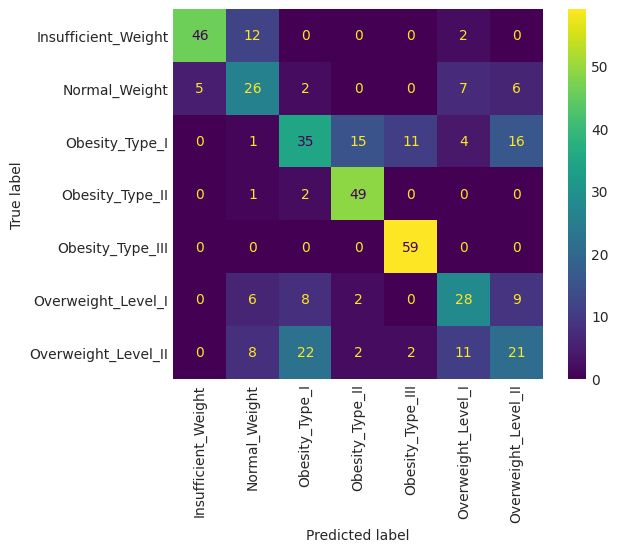

In [186]:
# Assessment Model
y_pred = log_reg.predict(X_test)
print(f'Accuracy = {accuracy_score(y_test, y_pred)}')
print('Classification Report : ')
print(classification_report(y_test, y_pred))
print('Confusion Matrix')
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred), display_labels=le_y.classes_).plot()
plt.xticks(rotation = 90)
plt.grid(False)
plt.show();

## `02` SVC

In [187]:
svc = GridSearchCV(SVC(), param_grid={'C': [0.1, 10, 100, 1000], 'gamma': [0.1, 0.01, 0.001, 0.001]})
svc.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 10, 100, 1000],
                         'gamma': [0.1, 0.01, 0.001, 0.001]})

Accuracy = 0.9090909090909091
Classification Report : 
              precision    recall  f1-score   support

           0       0.93      0.95      0.94        60
           1       0.78      0.70      0.74        46
           2       0.94      0.99      0.96        82
           3       1.00      0.98      0.99        52
           4       1.00      1.00      1.00        59
           5       0.77      0.81      0.79        53
           6       0.89      0.86      0.88        66

    accuracy                           0.91       418
   macro avg       0.90      0.90      0.90       418
weighted avg       0.91      0.91      0.91       418

Confusion Matrix


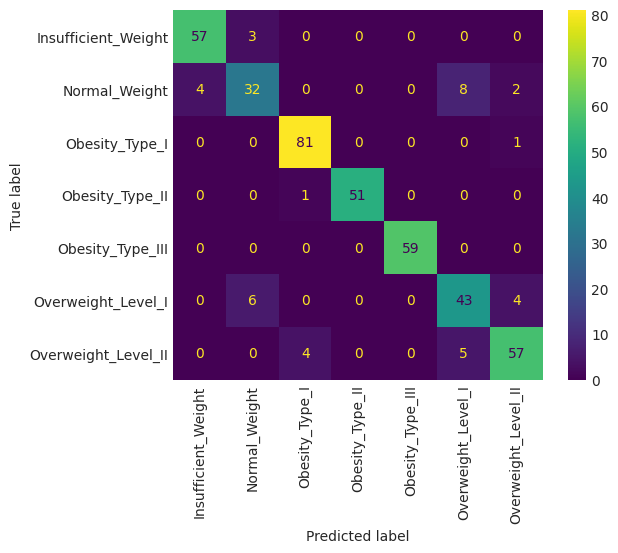

In [188]:
# Assessment Model
y_pred = svc.predict(X_test)
print(f'Accuracy = {accuracy_score(y_test, y_pred)}')
print('Classification Report : ')
print(classification_report(y_test, y_pred))
print('Confusion Matrix')
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred), display_labels=le_y.classes_).plot()
plt.xticks(rotation = 90)
plt.grid(False)
plt.show();

## `03` KNN

In [190]:
knn = GridSearchCV(KNeighborsClassifier(), param_grid={'n_neighbors': [1, 3, 5, 7, 9]})
knn.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 3, 5, 7, 9]})

Accuracy = 0.9019138755980861
Classification Report : 
              precision    recall  f1-score   support

           0       0.92      0.95      0.93        60
           1       0.84      0.59      0.69        46
           2       0.92      0.93      0.92        82
           3       0.91      0.98      0.94        52
           4       1.00      1.00      1.00        59
           5       0.84      0.91      0.87        53
           6       0.86      0.89      0.87        66

    accuracy                           0.90       418
   macro avg       0.90      0.89      0.89       418
weighted avg       0.90      0.90      0.90       418

Confusion Matrix


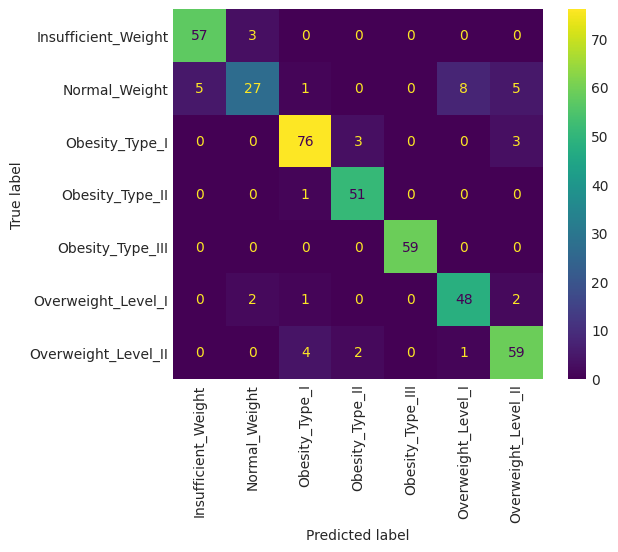

In [191]:
# Assessment Model
y_pred = knn.predict(X_test)
print(f'Accuracy = {accuracy_score(y_test, y_pred)}')
print('Classification Report : ')
print(classification_report(y_test, y_pred))
print('Confusion Matrix')
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred), display_labels=le_y.classes_).plot()
plt.xticks(rotation = 90)
plt.grid(False)
plt.show();

## `04` Decision Tree 

In [193]:
DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)

DecisionTreeClassifier()

Accuracy = 0.937799043062201
Classification Report : 
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        60
           1       0.84      0.80      0.82        46
           2       0.97      0.95      0.96        82
           3       0.96      0.98      0.97        52
           4       1.00      1.00      1.00        59
           5       0.84      0.89      0.86        53
           6       0.95      0.94      0.95        66

    accuracy                           0.94       418
   macro avg       0.93      0.93      0.93       418
weighted avg       0.94      0.94      0.94       418

Confusion Matrix


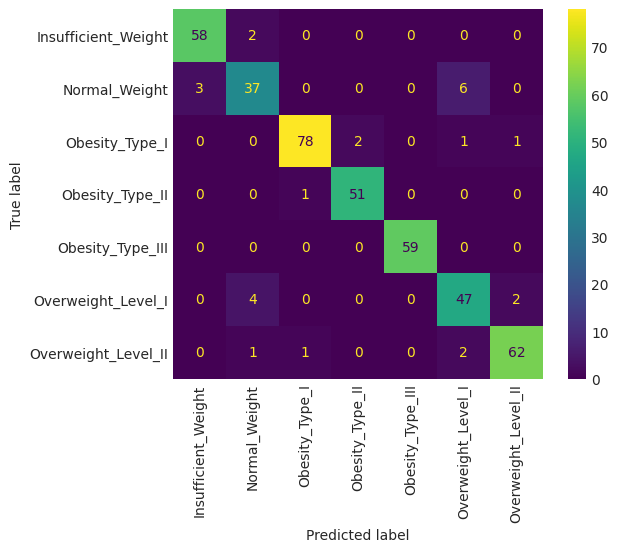

In [194]:
# Assessment Model
y_pred = DT.predict(X_test)
print(f'Accuracy = {accuracy_score(y_test, y_pred)}')
print('Classification Report : ')
print(classification_report(y_test, y_pred))
print('Confusion Matrix')
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred), display_labels=le_y.classes_).plot()
plt.xticks(rotation = 90)
plt.grid(False)
plt.show();

## `05` Random Forest

In [195]:
RF = GridSearchCV(RandomForestClassifier(), param_grid={'n_estimators': [10, 100, 1000]})
RF.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [10, 100, 1000]})

Accuracy = 0.9545454545454546
Classification Report : 
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        60
           1       0.88      0.91      0.89        46
           2       1.00      0.96      0.98        82
           3       0.98      0.98      0.98        52
           4       1.00      1.00      1.00        59
           5       0.90      0.89      0.90        53
           6       0.90      0.95      0.93        66

    accuracy                           0.95       418
   macro avg       0.95      0.95      0.95       418
weighted avg       0.96      0.95      0.95       418

Confusion Matrix


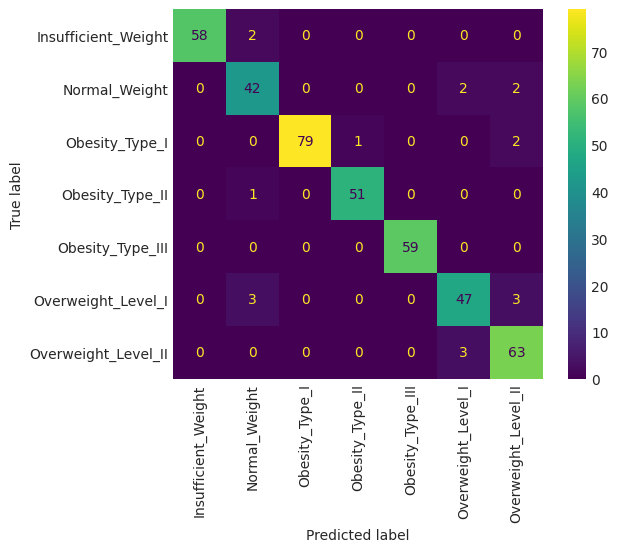

In [196]:
# Assessment Model
y_pred = RF.predict(X_test)
print(f'Accuracy = {accuracy_score(y_test, y_pred)}')
print('Classification Report : ')
print(classification_report(y_test, y_pred))
print('Confusion Matrix')
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred), display_labels=le_y.classes_).plot()
plt.xticks(rotation = 90)
plt.grid(False)
plt.show();

## `06` VotingClassifier

In [205]:
VC = VotingClassifier(estimators = [('svc', SVC(C=100,gamma=0.01)), ('DT', DecisionTreeClassifier()), ('RF', RandomForestClassifier(n_estimators=1000))])
VC.fit(X_train, y_train)

VotingClassifier(estimators=[('svc', SVC(C=100, gamma=0.01)),
                             ('DT', DecisionTreeClassifier()),
                             ('RF', RandomForestClassifier(n_estimators=1000))])

Accuracy = 0.9425837320574163
Classification Report : 
              precision    recall  f1-score   support

           0       0.97      0.95      0.96        60
           1       0.83      0.87      0.85        46
           2       0.96      0.98      0.97        82
           3       0.98      0.98      0.98        52
           4       1.00      1.00      1.00        59
           5       0.88      0.87      0.88        53
           6       0.94      0.92      0.93        66

    accuracy                           0.94       418
   macro avg       0.94      0.94      0.94       418
weighted avg       0.94      0.94      0.94       418

Confusion Matrix


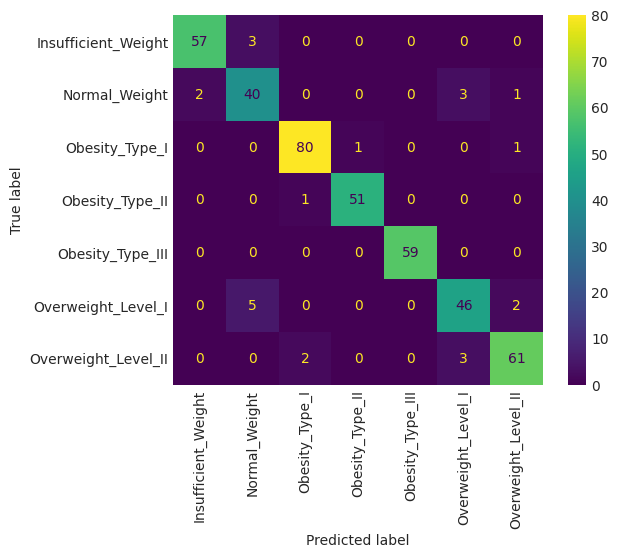

In [206]:
# Assessment Model
y_pred = VC.predict(X_test)
print(f'Accuracy = {accuracy_score(y_test, y_pred)}')
print('Classification Report : ')
print(classification_report(y_test, y_pred))
print('Confusion Matrix')
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred), display_labels=le_y.classes_).plot()
plt.xticks(rotation = 90)
plt.grid(False)
plt.show();

* ## `07` XGBoost

In [208]:
xg = XGBClassifier()
xg.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

Accuracy = 0.9569377990430622
Classification Report : 
              precision    recall  f1-score   support

           0       0.98      0.97      0.97        60
           1       0.93      0.87      0.90        46
           2       0.98      0.96      0.97        82
           3       0.98      0.98      0.98        52
           4       1.00      1.00      1.00        59
           5       0.88      0.92      0.90        53
           6       0.94      0.97      0.96        66

    accuracy                           0.96       418
   macro avg       0.96      0.95      0.95       418
weighted avg       0.96      0.96      0.96       418

Confusion Matrix


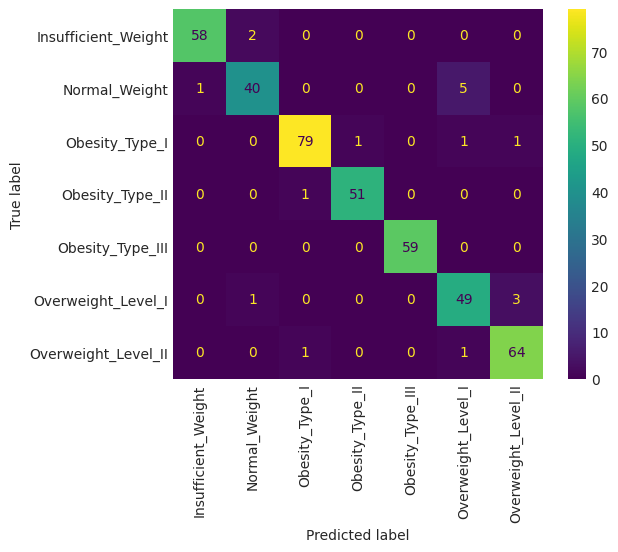

In [209]:
# Assessment Model
y_pred = xg.predict(X_test)
print(f'Accuracy = {accuracy_score(y_test, y_pred)}')
print('Classification Report : ')
print(classification_report(y_test, y_pred))
print('Confusion Matrix')
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred), display_labels=le_y.classes_).plot()
plt.xticks(rotation = 90)
plt.grid(False)
plt.show();

<div style="text-align: left; background-color:#4e4e4e; font-family: Trebuchet MS; color:white; padding: 12px; line-height:1.25;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 38px;border-style: solid;border-color: dark green;"> Save Model </div>


In [211]:
import pickle
with open('model.pkl', 'wb') as f:
    pickle.dump(xg, f)


<div style="text-align: left; background-color:#4e4e4e; font-family: Trebuchet MS; color:white; padding: 12px; line-height:1.25;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 38px;border-style: solid;border-color: dark green;"> Load Model And Test</div>


In [212]:
model = pickle.load(open('model.pkl', 'rb'))

In [214]:
data.sample()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
821,32.501143,0,1.675979,74.959747,2,1,2.291846,1.555557,0,0,1.0,1,0.0,0.388271,2,0,Overweight_Level_I


In [217]:
test_pred = model.predict([[32.501143, 0, 1.675979, 74.959747, 2, 1, 2.291846, 1.555557, 0, 0, 1, 1, 0, 0.388271, 2, 0]])
le_y.inverse_transform(test_pred)

array(['Overweight_Level_I'], dtype=object)